<a href="https://colab.research.google.com/github/DaffaYenza/CodeProject2/blob/main/bdp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
url = ("/content/drive/MyDrive/Colab Notebooks/survey lung cancer.csv")
df = pd.read_csv(url)
df.replace('?', pd.NA, inplace=True)

In [ ]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


# Preprocessing

In [ ]:
# Melihat informasi keselurahan tipe data masing-masing kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
# Melihat total kolom yang berisikan row NULL
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [ ]:
# Melihat keseluruhan kolom yang ada
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [ ]:
# Mengubah typo pada kolum "FATIGUE " dan "ALLERGY "
df.rename({"FATIGUE ":"FATIGUE", "ALLERGY ":"ALLERGY"},axis=1,inplace=True)
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [ ]:
# Membersihkan data duplikat
print("Duplicated row before cleansing: ", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicated row after cleansing: ", df.duplicated().sum())

Duplicated row before cleansing:  33
Duplicated row after cleansing:  0


In [ ]:
# Mengubah data kategorik menjadi data numerik
le = LabelEncoder()
df["LUNG_CANCER"] = le.fit_transform(df["LUNG_CANCER"])
df["GENDER"] = le.fit_transform(df["GENDER"])
df.head(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [ ]:
# Mengubah isi kolom yang berisikan 2 atau 1 menjadi 1 atau 0
for column in ['SMOKING','YELLOW_FINGERS','ANXIETY','PEER_PRESSURE','CHRONIC DISEASE','FATIGUE','ALLERGY','WHEEZING','ALCOHOL CONSUMING','COUGHING','SHORTNESS OF BREATH',
               'SWALLOWING DIFFICULTY','CHEST PAIN']:
    df[column].replace([1,2],[0,1],inplace=True)
df.head(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


# Modelling

In [ ]:
# X berisikan kolom yang dapat mempengaruhi kolom target.
# Y berisikan kolom yang akan diprediksi
X = df.drop(["LUNG_CANCER"], axis=1)
y = df["LUNG_CANCER"]

In [ ]:
# Splitting data menjadi 2 subdataset, yaitu train (80%) dan test (20%).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Normalisasi data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
ran = RandomForestClassifier(n_estimators = 300 , random_state=100)
ran.fit(X_train ,y_train)
y_predran = ran.predict(X_test)
print(classification_report(y_test, y_predran))

              precision    recall  f1-score   support

           0       1.00      0.42      0.59        12
           1       0.86      1.00      0.93        44

    accuracy                           0.88        56
   macro avg       0.93      0.71      0.76        56
weighted avg       0.89      0.88      0.85        56



In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_predgnb = gnb.predict(X_test)
print(classification_report(y_test, y_predgnb))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.91      0.98      0.95        44

    accuracy                           0.91        56
   macro avg       0.90      0.82      0.85        56
weighted avg       0.91      0.91      0.91        56



In [ ]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_predlr = lr.predict(X_test)
print(classification_report(y_test, y_predlr))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80        12
           1       0.92      1.00      0.96        44

    accuracy                           0.93        56
   macro avg       0.96      0.83      0.88        56
weighted avg       0.93      0.93      0.92        56



# Visualization

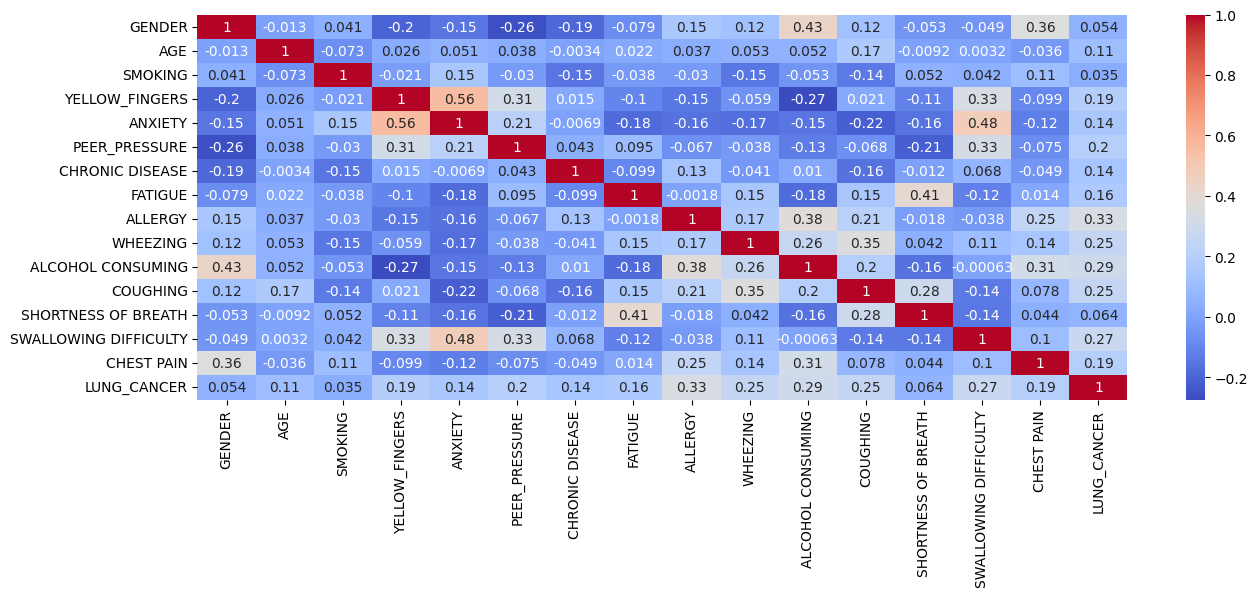

In [ ]:
plt.figure(figsize = (15,5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

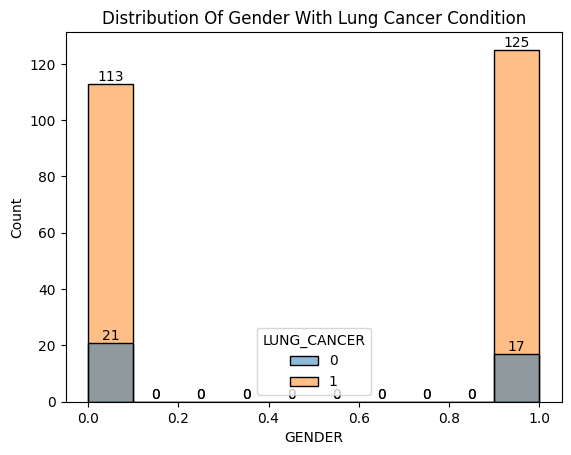

In [ ]:
axs = sns.histplot(data=df, x='GENDER', hue='LUNG_CANCER')
axs.set_title('Distribution Of Gender With Lung Cancer Condition')
for container in axs.containers:
    axs.bar_label(container)
plt.show()

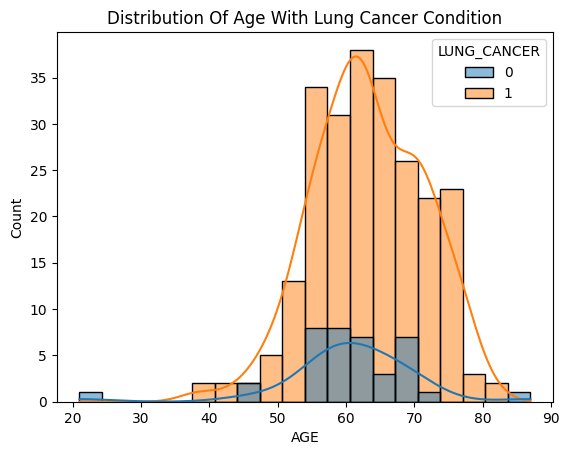

In [ ]:
axs = sns.histplot(data=df, x='AGE', kde=True, hue='LUNG_CANCER')
axs.set_title('Distribution Of Age With Lung Cancer Condition')
for container in axs.containers:
    axs.bar_label(container)
plt.show()

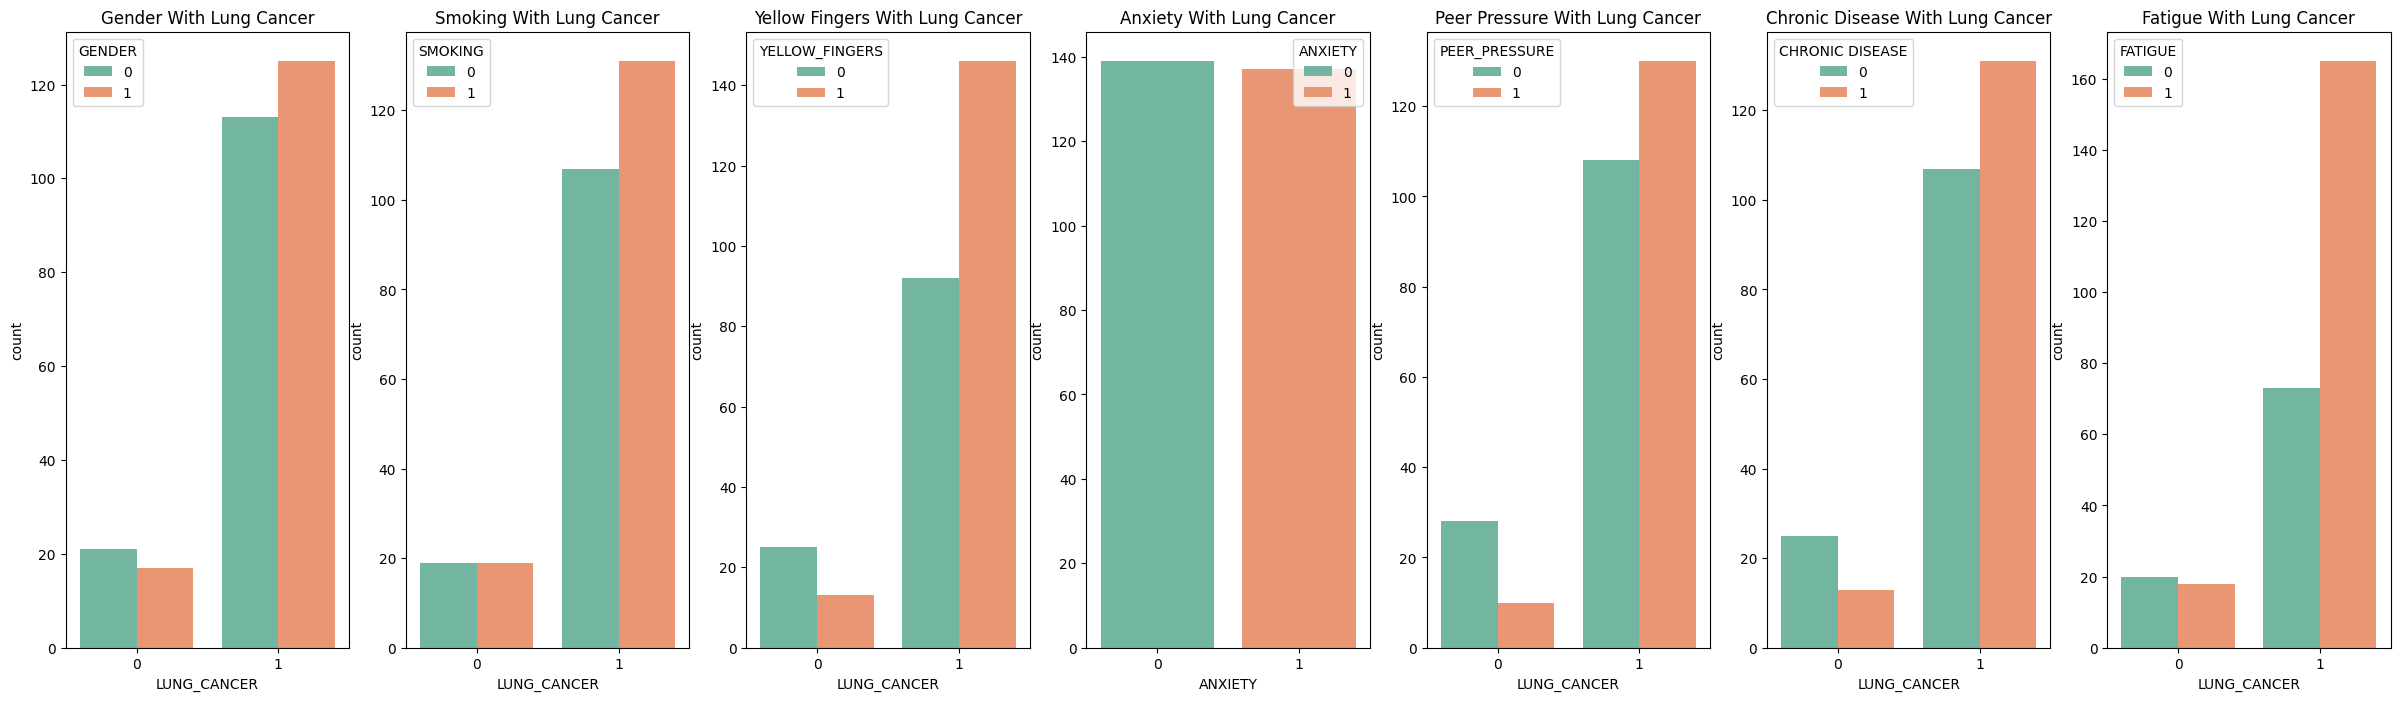

In [ ]:
fig, axs = plt.subplots(1, 7, figsize=(30,8))
sns.countplot(ax=axs[0], data=df, x="LUNG_CANCER", hue="GENDER", palette="Set2")
axs[0].set_title("Gender With Lung Cancer")
sns.countplot(ax=axs[1], data=df, x="LUNG_CANCER", hue="SMOKING", palette="Set2")
axs[1].set_title("Smoking With Lung Cancer")
sns.countplot(ax=axs[2], data=df, x="LUNG_CANCER", hue="YELLOW_FINGERS", palette="Set2")
axs[2].set_title("Yellow Fingers With Lung Cancer")
sns.countplot(ax=axs[3], data=df, x="ANXIETY", hue="ANXIETY", palette="Set2")
axs[3].set_title("Anxiety With Lung Cancer")
sns.countplot(ax=axs[4], data=df, x="LUNG_CANCER", hue="PEER_PRESSURE", palette="Set2")
axs[4].set_title("Peer Pressure With Lung Cancer")
sns.countplot(ax=axs[5], data=df, x="LUNG_CANCER", hue="CHRONIC DISEASE", palette="Set2")
axs[5].set_title("Chronic Disease With Lung Cancer")
sns.countplot(ax=axs[6], data=df, x="LUNG_CANCER", hue="FATIGUE", palette="Set2")
axs[6].set_title("Fatigue With Lung Cancer")
plt.show()

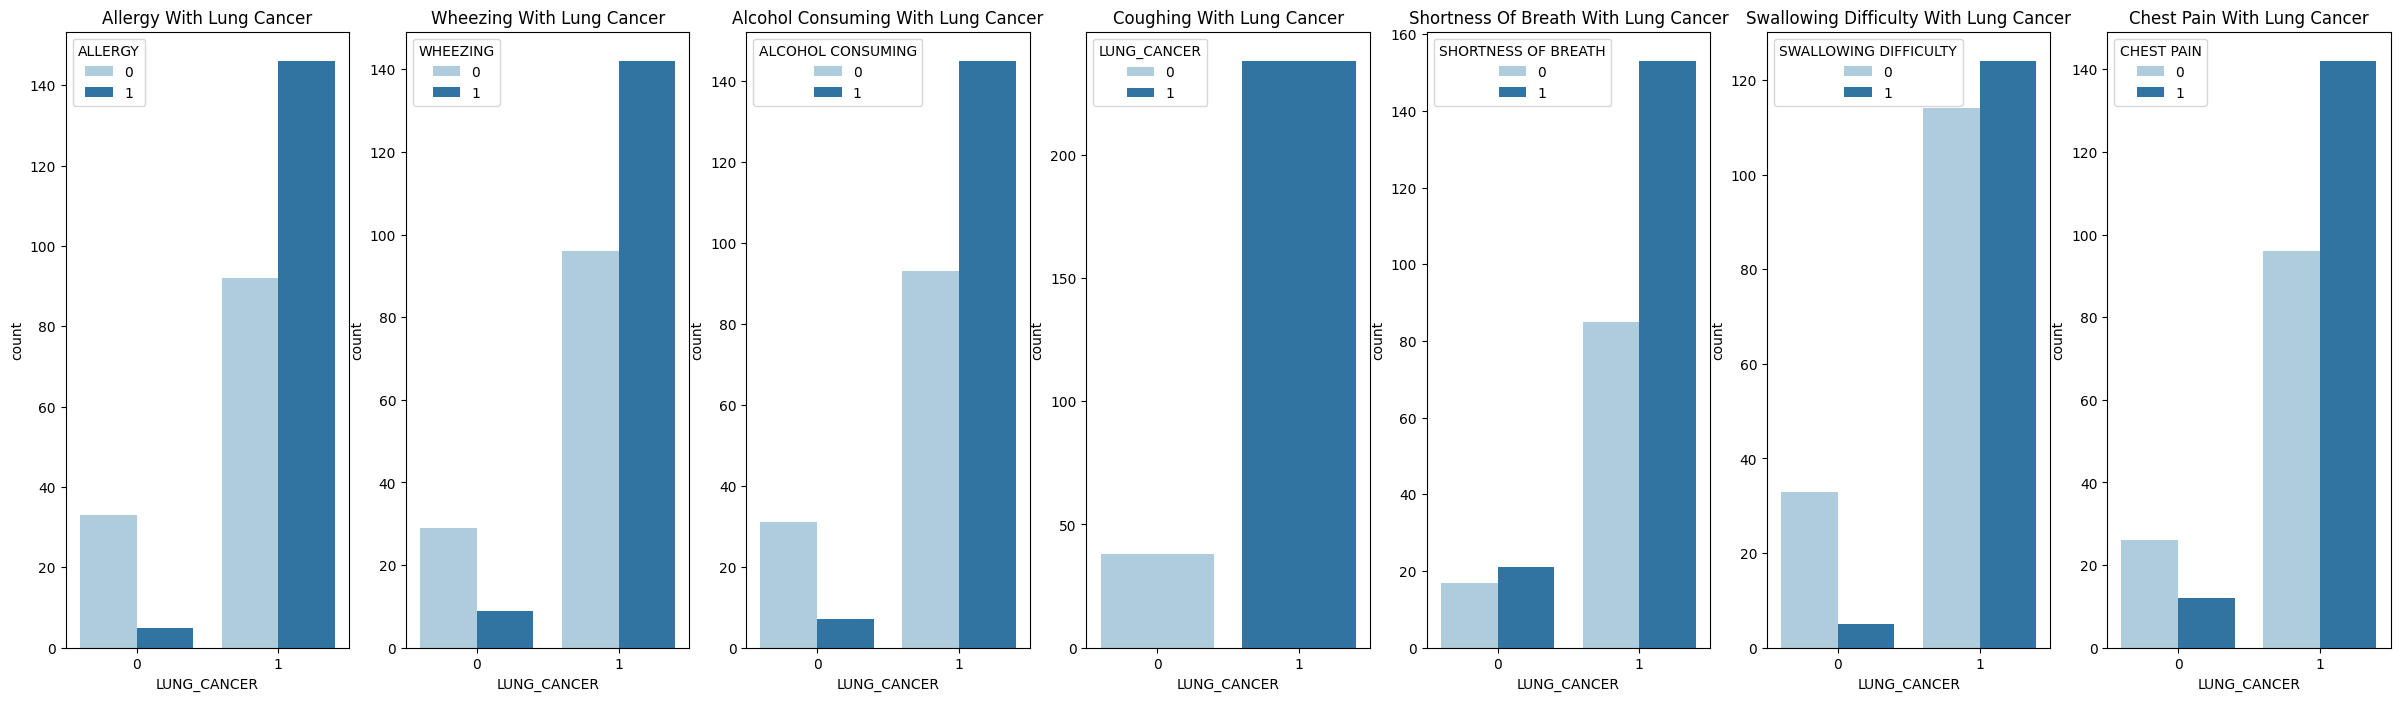

In [ ]:
fig, axs = plt.subplots(1, 7, figsize=(30,8))
sns.countplot(ax=axs[0], data=df, x="LUNG_CANCER", hue="ALLERGY", palette="Paired")
axs[0].set_title("Allergy With Lung Cancer")
sns.countplot(ax=axs[1], data=df, x="LUNG_CANCER", hue="WHEEZING", palette="Paired")
axs[1].set_title("Wheezing With Lung Cancer")
sns.countplot(ax=axs[2], data=df, x="LUNG_CANCER", hue="ALCOHOL CONSUMING", palette="Paired")
axs[2].set_title("Alcohol Consuming With Lung Cancer")
sns.countplot(ax=axs[3], data=df, x="LUNG_CANCER", hue="LUNG_CANCER", palette="Paired")
axs[3].set_title("Coughing With Lung Cancer")
sns.countplot(ax=axs[4], data=df, x="LUNG_CANCER", hue="SHORTNESS OF BREATH", palette="Paired")
axs[4].set_title("Shortness Of Breath With Lung Cancer")
sns.countplot(ax=axs[5], data=df, x="LUNG_CANCER", hue="SWALLOWING DIFFICULTY", palette="Paired")
axs[5].set_title("Swallowing Difficulty With Lung Cancer")
sns.countplot(ax=axs[6], data=df, x="LUNG_CANCER", hue="CHEST PAIN", palette="Paired")
axs[6].set_title("Chest Pain With Lung Cancer")
plt.show()